In [2]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
pi = np.pi

In [3]:
muB = sc.physical_constants['Bohr magneton'][0]
muN = sc.physical_constants['nuclear magneton'][0]

In [4]:
muB

9.2740100783e-24

In [14]:
fieldCal = 6.1

In [5]:
alphag = -37.9

def alphae(F, mF, theta):
    if (F==1/2):
        alpha = -22.4
    else:
        alpha = -22.4 + 7.6*(1/2)*(3*(np.cos(theta)**2)-1)*((3*(mF**2)-F*(F+1))/(F*(2*F-1)))
    return (1e-4)*alpha/4

In [6]:
gl = 1
gs = 2

def gj(s,l,j):
    return ( gl * (j*(j+1) - s*(s+1) + l*(l+1)) / (2*j*(j+1)) ) + ( gs * (j*(j+1) + s*(s+1) - l*(l+1)) / (2*j*(j+1)) )

def gf(i,s,l,j,f):
    return gj(s,l,j) * (f*(f+1) - i*(i+1) + j*(j+1)) / (2*f*(f+1))

In [8]:
def tweezer_depth_e(f,mf,P0,w0):
    I0 = 2*P0/(pi*(w0**2))
    alpha = alphae(f,mf,0)
    return alpha*I0

def tweezer_depth_g(P0,w0):
    I0 = 2*P0/(pi*(w0**2))
    return (1e-4)*alphag*I0/4

In [32]:
tweezer_depth_g(6e-3,460e-9)

-17103891.332276464

In [10]:
tweezer_depth_e(3/2,3/2,6e-3,460e-9) - tweezer_depth_g(6e-3,460e-9)

10424799.202522065

In [11]:
tweezer_depth_e(3/2,1/2,6e-3,460e-9) - tweezer_depth_g(6e-3,460e-9)

3565191.069260793

In [12]:
# for 171 3P1
def freq_shift(f,mf,B,P0,w0):
    dfB = gf(1/2,1,1,1,f)*muB*mf*B/(2*pi*sc.hbar)
    dfT = tweezer_depth_e(f,mf,P0,w0) - tweezer_depth_g(P0,w0)
    return dfB + dfT

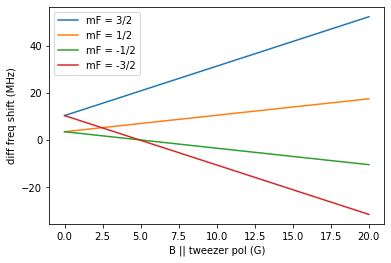

In [13]:
Bs = np.linspace(0, 20e-4, 100)
plt.plot(Bs*1e4, freq_shift(3/2,3/2,Bs,6e-3,460e-9)/(1e6), label='mF = 3/2')
plt.plot(Bs*1e4, freq_shift(3/2,1/2,Bs,6e-3,460e-9)/(1e6), label='mF = 1/2')
plt.plot(Bs*1e4, freq_shift(3/2,-1/2,Bs,6e-3,460e-9)/(1e6), label='mF = -1/2')
plt.plot(Bs*1e4, freq_shift(3/2,-3/2,Bs,6e-3,460e-9)/(1e6), label='mF = -3/2')
plt.xlabel('B || tweezer pol (G)')
plt.ylabel('diff freq shift (MHz)')
plt.legend()

In [30]:
fieldCal*3.5

21.349999999999998

In [36]:
freq_shift(3/2,3/2,21.35e-4,(0.9/3.07)*6e-3,460e-9)/(1e6) - freq_shift(3/2,1/2,21.35e-4,(0.9/3.07)*6e-3,460e-9)/(1e6)

31.892942977582052

In [46]:
freq_shift(3/2,1/2,0,(0.9/3.07)*6e-3,460e-9)/(1e6)

1.0451700203044672

In [40]:
freq_shift(3/2,1/2,0,(0.9/3.07)*6e-3,460e-9)/(1e6)

1.0451700203044672

In [47]:
tweezer_depth_g((0.9/3.07)*6e-3,460e-9)

-5014170.097410039

In [33]:
17*0.9/3.07

4.98371335504886

In [127]:
freq_shift(3/2,1/2,0,6e-3,460e-9)/(1e6)

3.5651910692607927

In [89]:
freq_shift(3/2,3/2,14.5e-4,6e-3,460e-9)

40866631.9384802

In [90]:
freq_shift(3/2,1/2,14.5e-4,6e-3,460e-9)

13712468.647913504

In [91]:
83.8+13.71

97.50999999999999

In [92]:
freq_shift(3/2,-1/2,14.5e-4,6e-3,460e-9)

-6582086.509391919

In [105]:
freq_shift(3/2,3/2,14.5e-4,(0.9/3.3)*6e-3,460e-9)*(1e-6) + 83.77

117.05495979119142

In [106]:
freq_shift(3/2,1/2,14.5e-4,(0.9/3.3)*6e-3,460e-9)*(1e-6) + 83.77

94.88960241572383

In [111]:
muN*(200e-9)/(2*pi*sc.hbar)

1.5245186458220639

In [42]:
tweezer_depth_e(3/2,1/2,(0.9/3.07)*6e-3,460e-9)

-3969000.077105572

In [44]:
64*np.sqrt(0.25/4)

16.0

In [120]:
freq_shift(3/2,3/2,0,(0.9/3.3)*6e-3,460e-9)*(1e-6)

2.8431270552332912

In [121]:
freq_shift(3/2,1/2,0,(0.9/3.3)*6e-3,460e-9)*(1e-6)

0.9723248370711254

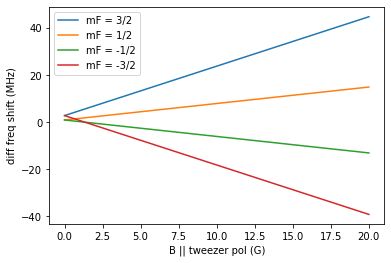

In [122]:
Bs = np.linspace(0, 20e-4, 100)
plt.plot(Bs*1e4, freq_shift(3/2,3/2,Bs,(0.9/3.3)*6e-3,460e-9)/(1e6), label='mF = 3/2')
plt.plot(Bs*1e4, freq_shift(3/2,1/2,Bs,(0.9/3.3)*6e-3,460e-9)/(1e6), label='mF = 1/2')
plt.plot(Bs*1e4, freq_shift(3/2,-1/2,Bs,(0.9/3.3)*6e-3,460e-9)/(1e6), label='mF = -1/2')
plt.plot(Bs*1e4, freq_shift(3/2,-3/2,Bs,(0.9/3.3)*6e-3,460e-9)/(1e6), label='mF = -3/2')
plt.xlabel('B || tweezer pol (G)')
plt.ylabel('diff freq shift (MHz)')
plt.legend()

In [124]:
1/0.5

2.0

In [ ]:
2/()

In [125]:
muN*(300e-9)/(2*pi*sc.hbar)

2.286777968733096